In [238]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [240]:
df = pd.read_excel('app_data.xlsx')

In [241]:
df = df[['Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score', 'Appendix_Diameter', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'Stool', 'Psoas_Sign']]

In [244]:
df = df.dropna()

In [281]:
df

,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,Stool,Psoas_Sign
0,appendicitis,appendicitis,4.0,7.1,yes,yes,no,no,yes,37.0,normal,yes
4,appendicitis,appendicitis,5.0,7.0,yes,yes,yes,yes,yes,36.9,constipation,yes
8,appendicitis,no appendicitis,7.0,3.7,yes,no,no,no,yes,37.3,normal,no
9,appendicitis,appendicitis,4.0,8.0,yes,no,no,yes,yes,37.1,normal,no
10,appendicitis,appendicitis,8.0,9.0,yes,no,yes,no,yes,38.0,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...
771,appendicitis,appendicitis,7.0,12.0,yes,no,no,yes,no,38.2,constipation,no
775,appendicitis,appendicitis,7.0,10.0,yes,no,no,yes,no,38.2,normal,no
777,appendicitis,appendicitis,8.0,7.5,yes,no,no,no,yes,39.4,diarrhea,yes
780,appendicitis,appendicitis,9.0,14.0,yes,no,yes,yes,no,37.5,normal,no


In [283]:
df['Alvarado_Score'].max()

10.0

In [285]:
df['Alvarado_Score'].min()

0.0

In [287]:
df['Appendix_Diameter'].max()

17.0

In [289]:
df['Appendix_Diameter'].min()

2.7

In [291]:
df['Body_Temperature'].max()

40.2

In [293]:
df['Body_Temperature'].min()

35.8

In [246]:
df_pos = df[df['Diagnosis'].isin(['appendicitis'])]
df_neg = df[~df['Diagnosis'].isin(['appendicitis'])]

In [248]:
df_pos

,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,Stool,Psoas_Sign
0,appendicitis,appendicitis,4.0,7.1,yes,yes,no,no,yes,37.0,normal,yes
4,appendicitis,appendicitis,5.0,7.0,yes,yes,yes,yes,yes,36.9,constipation,yes
9,appendicitis,appendicitis,4.0,8.0,yes,no,no,yes,yes,37.1,normal,no
10,appendicitis,appendicitis,8.0,9.0,yes,no,yes,no,yes,38.0,normal,no
14,appendicitis,appendicitis,8.0,9.0,yes,yes,yes,yes,yes,36.5,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...
771,appendicitis,appendicitis,7.0,12.0,yes,no,no,yes,no,38.2,constipation,no
775,appendicitis,appendicitis,7.0,10.0,yes,no,no,yes,no,38.2,normal,no
777,appendicitis,appendicitis,8.0,7.5,yes,no,no,no,yes,39.4,diarrhea,yes
780,appendicitis,appendicitis,9.0,14.0,yes,no,yes,yes,no,37.5,normal,no


In [250]:
df_neg

,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,Stool,Psoas_Sign
8,appendicitis,no appendicitis,7.0,3.7,yes,no,no,no,yes,37.3,normal,no
15,appendicitis,no appendicitis,3.0,9.0,yes,no,no,no,yes,36.2,diarrhea,no
19,appendicitis,no appendicitis,3.0,5.0,yes,no,no,no,no,36.3,normal,no
24,appendicitis,no appendicitis,2.0,7.0,yes,no,no,no,no,37.0,normal,no
27,appendicitis,no appendicitis,4.0,5.0,yes,no,yes,yes,yes,37.0,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...
448,no appendicitis,no appendicitis,2.0,7.2,yes,no,no,no,no,36.8,normal,no
449,appendicitis,no appendicitis,6.0,4.7,yes,yes,yes,yes,no,38.0,normal,no
452,appendicitis,no appendicitis,7.0,5.0,yes,no,no,yes,yes,36.3,normal,no
455,appendicitis,no appendicitis,3.0,6.7,yes,no,no,no,no,37.4,normal,no


In [295]:
df_pos['Alvarado_Score'].max()

10.0

In [297]:
df_pos['Alvarado_Score'].min()

2.0

In [299]:
df_pos['Appendix_Diameter'].max()

17.0

In [301]:
df_pos['Appendix_Diameter'].min()

4.4

In [303]:
df_pos['Body_Temperature'].max()

40.2

In [305]:
df_pos['Body_Temperature'].min()

35.8

In [307]:
df_neg['Alvarado_Score'].max()

9.0

In [313]:
df_neg['Alvarado_Score'].min()

0.0

In [317]:
df_neg['Appendix_Diameter'].max()

9.5

In [319]:
df_neg['Appendix_Diameter'].min()

2.7

In [321]:
df_neg['Body_Temperature'].max()

39.9

In [323]:
df_neg['Body_Temperature'].min()

36.0

In [252]:
print(df_pos['Alvarado_Score'].mean())

6.556547619047619


In [254]:
print(df_neg['Alvarado_Score'].mean())

4.383333333333334


In [256]:
print(df_pos['Appendix_Diameter'].mean())

8.592559523809525


In [258]:
print(df_neg['Appendix_Diameter'].mean())

5.060833333333333


In [260]:
print(df_pos['Body_Temperature'].mean())

37.38392857142857


In [262]:
print(df_neg['Body_Temperature'].mean())

37.139166666666675


In [264]:
df.loc[(df['Diagnosis_Presumptive'] == 'appendicitis') & (df['Diagnosis'] != 'appendicitis')].shape

(91, 12)

In [273]:
df.loc[(df['Diagnosis_Presumptive'] == 'appendicitis') & (df['Diagnosis'] != 'appendicitis')].shape[0]/df_pos.shape[0]

0.2708333333333333

In [266]:
df.loc[(df['Diagnosis_Presumptive'] != 'appendicitis') & (df['Diagnosis'] == 'appendicitis')].shape

(3, 12)

In [279]:
df.loc[(df['Diagnosis_Presumptive'] != 'appendicitis') & (df['Diagnosis'] == 'appendicitis')].shape[0]/df_neg.shape[0]

0.025

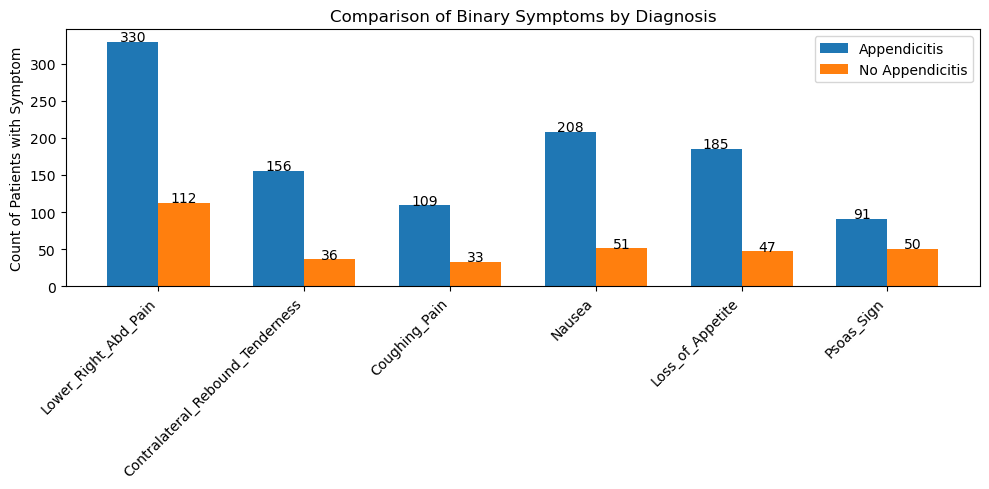

In [268]:
binary_features = ['Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Psoas_Sign']

df_clean = df.copy()
df_clean[binary_features] = df_clean[binary_features].replace({'yes': 1, 'no': 0})
df_clean[binary_features] = df_clean[binary_features].astype(float)

group1 = df_clean[df_clean['Diagnosis'] == 'appendicitis']
group2 = df_clean[df_clean['Diagnosis'] == 'no appendicitis']

group1_counts = group1[binary_features].sum()
group2_counts = group2[binary_features].sum()

x = np.arange(len(binary_features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, means1, width, label='Appendicitis')
ax.bar(x + width/2, means2, width, label='No Appendicitis')

ax.set_ylabel('Count of Patients with Symptom')
ax.set_title('Comparison of Binary Symptoms by Diagnosis')
ax.set_xticks(x)
ax.set_xticklabels(binary_features, rotation=45, ha='right')
ax.legend()

for i in range(len(binary_features)):
    ax.text(x[i] - width/2, group1_counts[i] + 1, int(group1_counts[i]), ha='center')
    ax.text(x[i] + width/2, group2_counts[i] + 1, int(group2_counts[i]), ha='center')

plt.tight_layout()
plt.show()

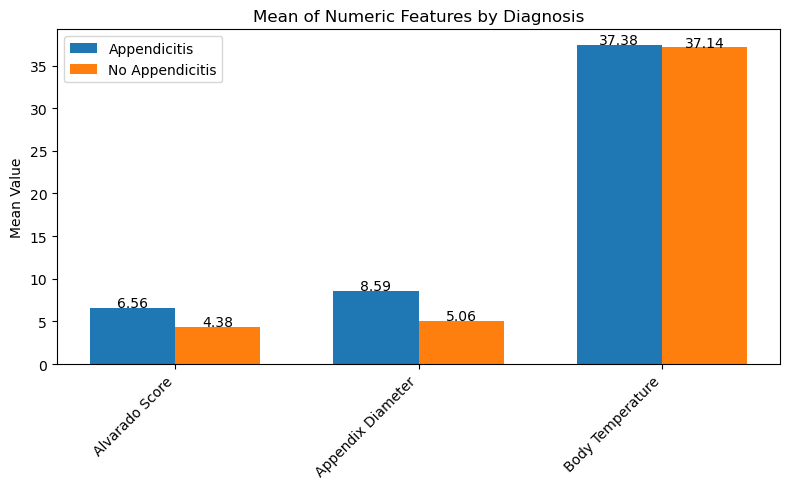

In [270]:
numeric_features = ['Alvarado_Score', 'Appendix_Diameter', 'Body_Temperature']

group1_means = group1[numeric_features].mean()
group2_means = group2[numeric_features].mean()

x = np.arange(len(numeric_features))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, group1_means, width, label='Appendicitis')
ax.bar(x + width/2, group2_means, width, label='No Appendicitis')

ax.set_ylabel('Mean Value')
ax.set_title('Mean of Numeric Features by Diagnosis')
ax.set_xticks(x)
ax.set_xticklabels([f.replace('_', ' ').title() for f in numeric_features], rotation=45, ha='right')
ax.legend()

for i in range(len(numeric_features)):
    ax.text(x[i] - width/2, group1_means[i] + 0.1, f'{group1_means[i]:.2f}', ha='center')
    ax.text(x[i] + width/2, group2_means[i] + 0.1, f'{group2_means[i]:.2f}', ha='center')

plt.tight_layout()
plt.show()